In [1]:
!pip install pandas scikit-learn

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [4]:
import pandas as pd
df = pd.read_csv('/content/urlset2 (2).csv')

<ipython-input-4-a138433e172b>:2: DtypeWarning: Columns (1,2,3,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/urlset2 (2).csv')


In [5]:
df.head(10)

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label,Unnamed: 14
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1,0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1,NaN
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0,0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0,0.768577,1,NaN
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0,0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0,0.726582,1,NaN
3,mail.printakid.com/www.online.americanexpress....,10000000,0,0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0,0.85964,1,NaN
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0,0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0,0.748971,1,NaN
5,smilesvoegol.servebbs.org/voegol.php,10000000,0,0,2.0,223.500000,234.000000,0.0,0.0,0.0,0.0,0,0.852227,1,NaN
6,premierpaymentprocessing.com/includes/boleto-2...,10000000,0,0,4.0,119.000000,121.500000,0.0,0.0,0.0,0.0,0,0.853565,1,NaN
7,myxxxcollection.com/v1/js/jih321/bpd.com.do/do...,10000000,0,0,4.0,160.500000,157.250000,0.0,0.0,0.0,0.0,0,0.777622,1,NaN
8,super1000.info/docs,10000000,0,0,1.0,21.000000,13.000000,0.0,0.0,0.0,0.0,0,0.36,1,NaN
9,horizonsgallery.com/js/bin/ssl1/_id/www.paypal...,10000000,0,0,16.0,142.375000,142.500000,0.0,0.0,0.0,0.0,0,0.803006,1,NaN


In [6]:
df.isnull().sum()

domain               4
ranking             56
mld_res             74
mld.ps_res          85
card_rem            86
ratio_Rrem          86
ratio_Arem          86
jaccard_RR          87
jaccard_RA          88
jaccard_AR          89
jaccard_AA          90
jaccard_ARrd        90
jaccard_ARrem       92
label               96
Unnamed: 14      96010
dtype: int64

In [7]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [8]:
df.isnull().sum()

domain            4
ranking          56
mld_res          74
mld.ps_res       85
card_rem         86
ratio_Rrem       86
ratio_Arem       86
jaccard_RR       87
jaccard_RA       88
jaccard_AR       89
jaccard_AA       90
jaccard_ARrd     90
jaccard_ARrem    92
label            96
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

# Assuming 'label' is your target variable and the rest are features
X = df.drop('label', axis=1)  # Select all columns except 'label' as features
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [10]:
string_columns = X.select_dtypes(include=['object']).columns

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [12]:
string_columns = df.select_dtypes(include=['object']).columns

In [13]:
label_encoders = {}
for col in string_columns:
    # Convert the column to string type to ensure uniformity
    df[col] = df[col].astype(str)  #This will convert all values to strings
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [14]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
!pip install scikit-learn
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [17]:
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns = df.columns


X = df_imputed.iloc[:, :-1]
y = df_imputed.iloc[:, -1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
#apply decision tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
dec_tree_accuracy = accuracy_score(y_test, y_pred_dec_tree)

In [22]:
#accuracies
print(f'Logistic Regression Accuracy: {log_reg_accuracy}')
print(f'Decision Tree Accuracy: {dec_tree_accuracy}')


Logistic Regression Accuracy: 0.8153034300791556
Decision Tree Accuracy: 0.9463963338425219


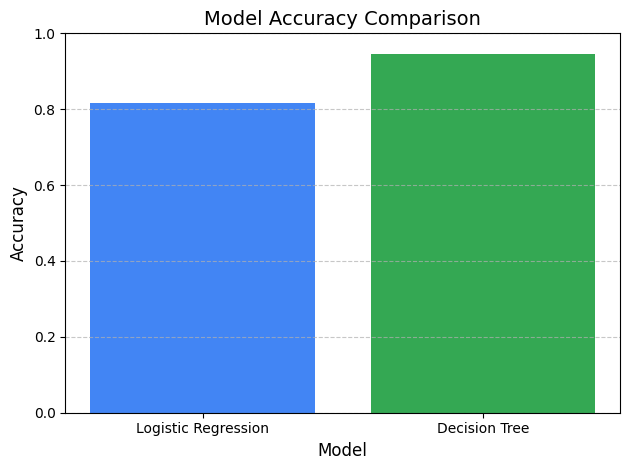

In [25]:
import matplotlib.pyplot as plt


x = ['Logistic Regression', 'Decision Tree']
y = [log_reg_accuracy, dec_tree_accuracy]

plt.bar(x, y, color=['#4285F4', '#34A853'])
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylim([0, 1])
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()